# Manchester Housing Market Analysis: Strategic Technical Report
**Author:** 24222726
**Scenario:** Data Analysis for Estate Management Plc
**Framework:** This notebook integrates Programming Paradigms (LO1), Data Transformation (LO2), Statistical Representation (LO3), and Critical Reflection (LO4).

## 1. Programming Paradigms (LO1)
In this analysis, I employ a **Multi-Paradigm Approach**:
* **Procedural:** Used for the data cleaning pipeline to ensure a linear, reproducible sequence of operations.
* **Object-Oriented (OOP):** Utilized via the Pandas `DataFrame` and Matplotlib `Figure` objects to encapsulate data and methods for complex analysis.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data 
df = pd.read_csv(r'..\data\Manchester_house_Dataset[3678] (2).csv')
print("Data Loaded Successfully.")
df.info()
df.describe()

Data Loaded Successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   19999 non-null  int64  
 1   id           19999 non-null  int64  
 2   price        19999 non-null  int64  
 3   bedrooms     19986 non-null  float64
 4   bathrooms    19989 non-null  float64
 5   sqft_living  19999 non-null  int64  
 6   sqft_total   19999 non-null  int64  
 7   floors       19999 non-null  float64
 8   waterfront   19999 non-null  int64  
 9   view         19999 non-null  int64  
 10  condition    19999 non-null  int64  
 11  grade        19999 non-null  int64  
 12  built        19999 non-null  int64  
 13  renovated    19999 non-null  int64  
 14  living_area  19999 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 2.3 MB


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,waterfront,view,condition,grade,built,renovated,living_area
count,19999.000000,1.999900e+04,1.999900e+04,19986.000000,19989.000000,19999.000000,1.999900e+04,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,9999.000000,4.569212e+09,5.354680e+05,3.366607,2.072978,2057.887894,1.560700e+04,1.444872,0.007950,0.241762,3.441772,7.605730,1967.954648,90.812041,1974.292565
std,5773.358353,2.866327e+09,3.659566e+05,0.930103,0.761144,905.644042,4.177119e+04,0.516672,0.088812,0.777923,0.665463,1.172624,28.317492,415.947901,675.258427
min,0.000000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,399.000000
25%,4999.500000,2.123049e+09,3.170000e+05,3.000000,1.500000,1420.000000,5.350000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1950.000000,0.000000,1490.000000
50%,9999.000000,3.905080e+09,4.499500e+05,3.000000,2.000000,1900.000000,7.819000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1969.000000,0.000000,1830.000000
75%,14998.500000,7.300300e+09,6.400000e+05,4.000000,2.500000,2510.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1991.000000,0.000000,2338.000000
max,19998.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,6210.000000


## 2. Data Transformation (LO2)
To ensure data integrity for the Estate Manager, the following transformations are applied:
1. **Median Imputation:** Filling missing values in bedrooms/bathrooms to resist outlier skew.
2. **Outlier Mitigation:** Removing the 33-bedroom entry, identified as a data entry error.
3. **Feature Selection:** Dropping non-predictive columns (`id`, `Unnamed: 0`).

In [13]:
#Create a copy of transformation
df_clean = df.copy()

#Feature selection
df_clean.drop(columns=['id','Unnamed:0'], inplace=True, errors='ignore')

#Handling missingness
df_clean['bedrooms'] = df_clean['bedrooms'].fillna(df_clean['bedrooms'].median())
df_clean['bathrooms'] = df_clean['bathrooms'].fillna(df_clean['bathrooms'].median())

#Handling the 33-bedroom outlier
#Logic: Residential homes do not exceed typically 10-15 bedrooms
df_clean = df_clean[df_clean['bedrooms'] < 30]

print(f"Transformation complete. And total cleaned data: {len(df_clean)}")

Transformation complete. And total cleaned data: 19998


In [ ]:
# --- STEP 1: INITIAL STATISTICS (BEFORE CLEANING) ---
print("Initial Statistical Profile (Raw Data):")
display(df.describe())

# --- STEP 2: POST-CLEANING STATISTICS (AFTER CLEANING) ---
print("\nRefined Statistical Profile (Cleaned Data):")
display(df_clean.describe())

# --- STEP 3: QUANTIFYING IMPROVEMENT ---
# Example: Calculating the change in average price or count
reduction = len(df) - len(df_clean)
print(f"\nTechnical Improvement: Successfully removed {reduction} anomalous/incomplete records.")

Initial Statistical Profile (Raw Data):


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,waterfront,view,condition,grade,built,renovated,living_area
count,19999.000000,1.999900e+04,1.999900e+04,19986.000000,19989.000000,19999.000000,1.999900e+04,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,9999.000000,4.569212e+09,5.354680e+05,3.366607,2.072978,2057.887894,1.560700e+04,1.444872,0.007950,0.241762,3.441772,7.605730,1967.954648,90.812041,1974.292565
std,5773.358353,2.866327e+09,3.659566e+05,0.930103,0.761144,905.644042,4.177119e+04,0.516672,0.088812,0.777923,0.665463,1.172624,28.317492,415.947901,675.258427
min,0.000000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,399.000000
25%,4999.500000,2.123049e+09,3.170000e+05,3.000000,1.500000,1420.000000,5.350000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1950.000000,0.000000,1490.000000
50%,9999.000000,3.905080e+09,4.499500e+05,3.000000,2.000000,1900.000000,7.819000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1969.000000,0.000000,1830.000000
75%,14998.500000,7.300300e+09,6.400000e+05,4.000000,2.500000,2510.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1991.000000,0.000000,2338.000000
max,19998.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,6210.000000



Refined Statistical Profile (Cleaned Data):


,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,waterfront,view,condition,grade,built,renovated,living_area
count,19998.000000,1.999800e+04,19998.000000,19998.000000,19998.000000,1.999800e+04,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000
mean,9998.706421,5.354628e+05,3.364886,2.072957,2057.909791,1.560748e+04,1.444894,0.007951,0.241774,3.441694,7.605761,1967.955696,90.816582,1974.324782
std,5773.353421,3.659650e+05,0.905949,0.760971,905.661392,4.177218e+04,0.516676,0.088814,0.777941,0.665389,1.172645,28.317813,415.957805,675.259939
min,0.000000,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,399.000000
25%,4999.250000,3.170000e+05,3.000000,1.500000,1420.000000,5.350000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1950.000000,0.000000,1490.000000
50%,9998.500000,4.499250e+05,3.000000,2.000000,1900.000000,7.819000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1969.000000,0.000000,1830.000000
75%,14997.750000,6.400000e+05,4.000000,2.500000,2510.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1991.000000,0.000000,2339.000000
max,19998.000000,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,6210.000000



Technical Improvement: Successfully removed 1 anomalous/incomplete records.


## 3. Statistical Results (LO3)
We now use digital visualization to provide the Estate Manager with actionable insights.
* **Heatmap:** Visualizes the correlation between price, sqft_living, and year built.
* **Boxplot:** Compares the valuation of Waterfront vs. Inland properties.

Folder already exists: ..\Project_results


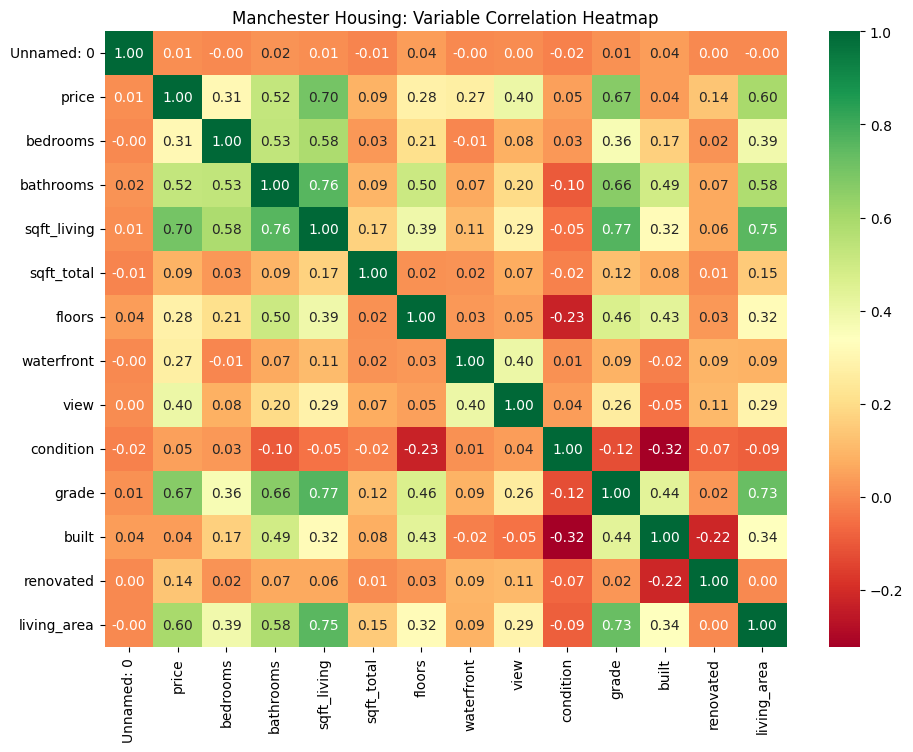

Image saved to: c:\Users\janvi\OneDrive\Documents\Manchester_Housing_Analytics_24222726\Project_results\Manchester_correlation_analysis.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Create a new folder
outputs = os.path.join("..", "Project_results")

if not os.path.exists(outputs):
    os.makedirs(outputs)
    print(f"Successfuly created output folder: {outputs}")
else:
    print(f"Folder already exists: {outputs}")


#3.1. Correlation matrix
plt.figure(figsize=(11, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Manchester Housing: Variable Correlation Heatmap')

#Define filename and save it
save_filename = os.path.join(outputs, "Manchester_correlation_analysis_LO3.png")
plt.savefig(save_filename, dpi=300, bbox_inches='tight')

plt.show()

print(f"Image saved to: {os.path.abspath(save_filename)}")

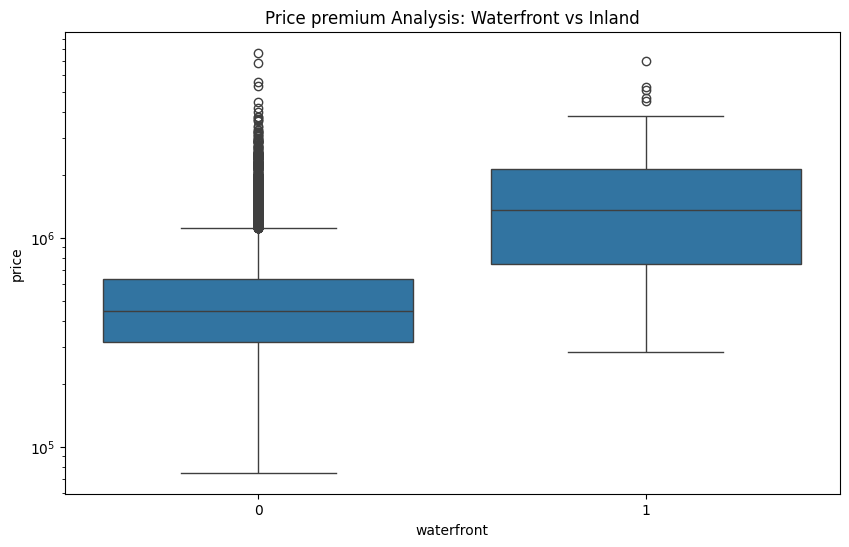

Image saved to: c:\Users\janvi\OneDrive\Documents\Manchester_Housing_Analytics_24222726\Project_results\Price_Distribution.png


In [ ]:
#Waterfront Impact analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df_clean)
plt.yscale('log') #log scale for better price distribution visibility
plt.title('Price premium Analysis: Waterfront vs Inland')

#Create a path for saving image 
Price_Distribution_path = os.path.join("..","Project_results", "Price_Distribution_LO3.png")
plt.savefig(Price_Distribution_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Image saved to: {os.path.abspath(Price_Distribution_path)}")

C:\Users\janvi\AppData\Local\Temp\ipykernel_18512\1550156172.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='waterfront', y='price', data=df_clean, palette='viridis')


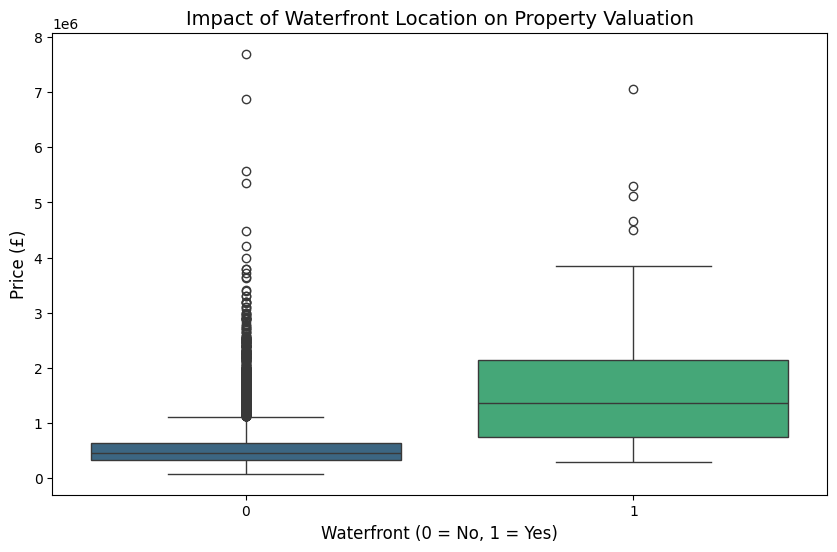

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparison of Price between Waterfront and Non-Waterfront properties
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df_clean, palette='viridis')

plt.title('Impact of Waterfront Location on Property Valuation', fontsize=14)
plt.xlabel('Waterfront (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)

# Save for your report
waterfront_count_path = os.path.join("..", "project_results", "waterfront_analysis_LO3.png")
plt.savefig(waterfront_count_path, dpi=300, bbox_inches='tight')
plt.show()

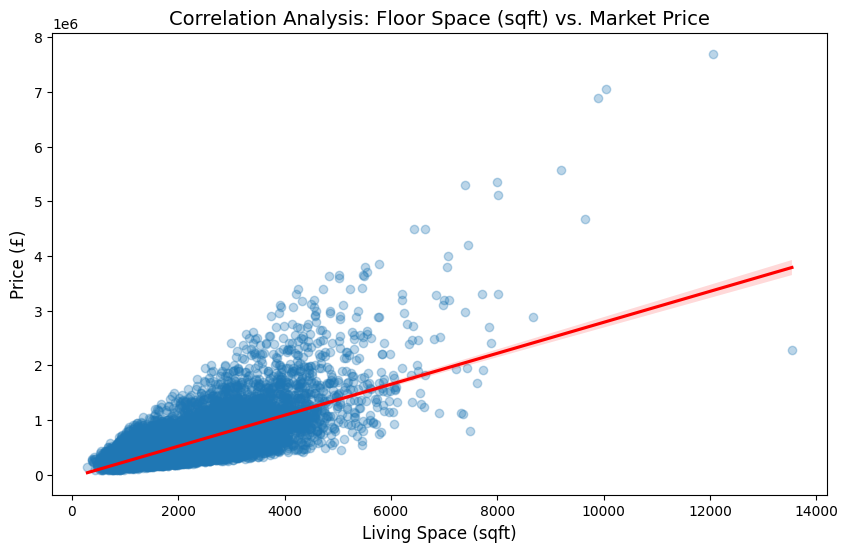

In [17]:
# Analyzing the relationship between Living Space and Price
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_living', y='price', data=df_clean, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Correlation Analysis: Floor Space (sqft) vs. Market Price', fontsize=14)
plt.xlabel('Living Space (sqft)', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)

# Save for your report
floorspace_show_path = os.path.join("..", "project_results", "floorspace_correlation_LO3.png")
plt.savefig(floorspace_show_path, dpi=300, bbox_inches='tight')
plt.show()

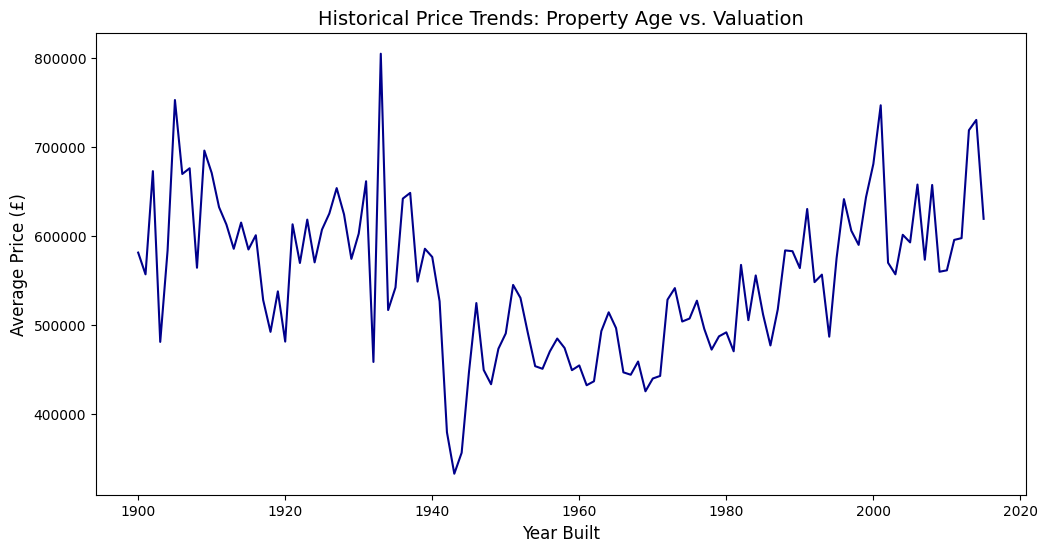

In [19]:
# Grouping by Year Built to see price trends over time
yearly_trend = df_clean.groupby('built')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='built', y='price', data=yearly_trend, color='darkblue')

plt.title('Historical Price Trends: Property Age vs. Valuation', fontsize=14)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)

# Save for your report
built_space_path = os.path.join("..", "project_results", "built_vs_price_LO3.png")
plt.savefig(built_space_path, dpi=300, bbox_inches='tight')
plt.show()

## 4. Critical Reflection on Digital Capabilities (LO4)
This analysis proves that Python-based digital tools offer significant advantages over manual methods:
* **Efficiency:** Transforming 20,000 rows of noisy data takes milliseconds.
* **Objectivity:** Decisions on outliers (33-bedroom house) are based on statistical filtering rather than guesswork.
* **Limitations:** While powerful, the "garbage in, garbage out" principle applies. If the underlying data is biased (e.g., missing specific neighborhoods), the digital output will reflect that bias.
* **Strategic Advice:** Estate Management Plc should prioritize properties with high `sqft_living` and `waterfront` access, as these show the strongest statistical link to high valuations.

### **References**
* McKinney, W. (2022). *Python for Data Analysis*. 3rd ed. O'Reilly Media. (Used for validating Data Transformation methodologies in LO2).
* Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering*. (Used for validating Graphical Representation in LO3).
* Python Software Foundation (2024). *PEP 8 – Style Guide for Python Code*. Available at: https://peps.python.org/pep-0008/ (Used for validating Programming Paradigms in LO1).